In [1]:
from uproot_io import Events, View
import numpy as np
from numpy import *
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
titlesize = 20
labelsize = 14

In [2]:
events = Events(r"C:\Users\andre\Desktop\Physics Project\bigdata\CheatedRecoFile_1.root")

In [3]:
def localfits(event_number):
    parts = []
    sds = []
    grads = []
    
    idx = np.where(events.event_number == event_number)[0]
    for n in idx:
        x = np.array(events.reco_hits_x_w[n])
        z = np.array(events.reco_hits_w[n])
        part = events.mc_pdg[n]
        
        if part != 0 and len(x) > 10:
            window_size = 5
            gradients = []
            half = len(x)//2
            #for i in range(half, len(x) - window_size + 1):
            for i in range(len(x) - window_size + 1):
                x_window = x[i:i + window_size]
                z_window = z[i:i + window_size]
                
                model = LinearRegression()
                model.fit(x_window.reshape(-1, 1), z_window)

                gradient = model.coef_[0]
                gradients.append(np.round(gradient))
            
            unique = list(set(gradients))
            grads.append(gradients)
            parts.append(part)
            sds.append(np.std(unique))
            #sds.append(max(gradients)-min(gradients))

    return np.array(sds), np.array(parts)

In [4]:
localfits(2457)

(array([16.408085,  0.5     ,  0.      ], dtype=float32),
 array([  11, 2212, 2212]))

In [5]:
def histplot(num, extra):
    tracks = []
    showers = []
    
    for n in range(num):
        sd, part = localfits(n+extra)
        for i in range(len(sd)):
            #if sd[i] != 0. and sd[i] != -0. and total[i] <= 20:
            if part[i] == 22. or part[i] == -11. or part[i] == 11.:
                showers.append(sd[i])
            else:
                tracks.append(sd[i])
    
    #newshowers = [x for x in showers if x > 2]
    
    bin_edges = np.arange(0, 25.5, 1)
    hist1, _ = np.histogram(tracks, bins=bin_edges)
    hist2, _ = np.histogram(showers, bins=bin_edges)
   
    hist1_normalized = hist1 / len(tracks)
    hist2_normalized = hist2 / len(showers)

    plt.bar(bin_edges[:-1], hist1_normalized, width=1, align='edge', alpha=0.75, label='Tracks')
    plt.bar(bin_edges[:-1], hist2_normalized, width=1, align='edge', alpha=0.75, label='Showers')
    
    plt.xlabel('Stardard Deviation of Gradients of Local Fits')
    plt.legend()
    plt.show()

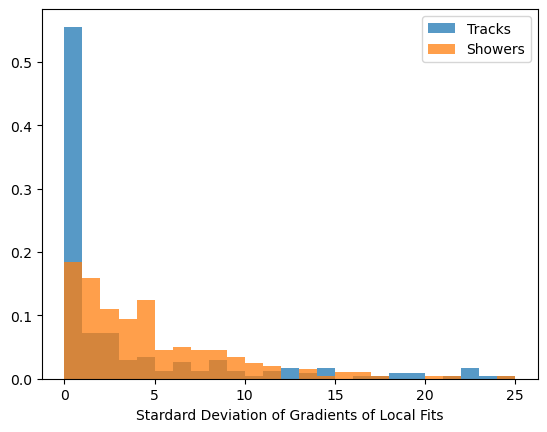

In [6]:
histplot(100, 5230)